# Zomato Data Analysis Project

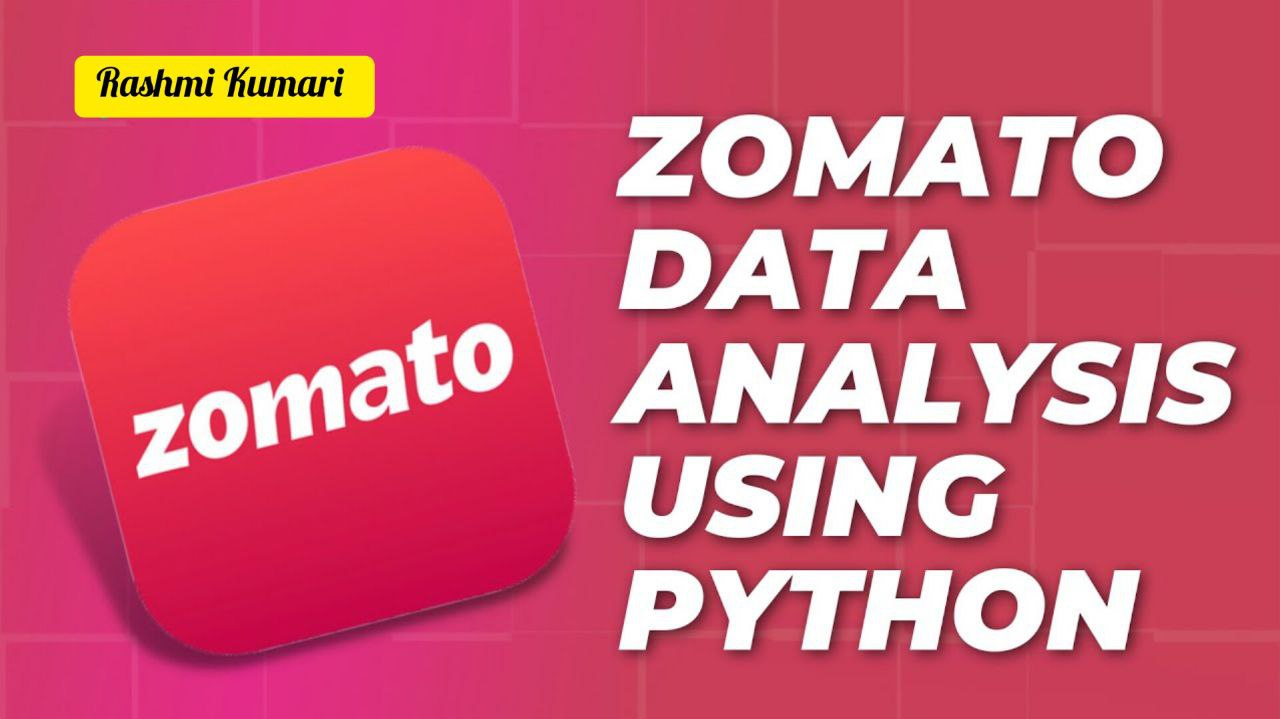

# IMPORTED NECESSARY PANDAYS LIBRARY 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# CREATE THE DATAFRAME 

In [10]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

# Let's convert the data type of the "rate" column to float and remove the denominator 

In [13]:
def handleRate(value):
    value = str(value).split('/')  # Indentation added
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# Summary of the dataframe

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Conclusion- There is no Null values in dataframe

# Types of Restaurant

In [15]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of resturant')

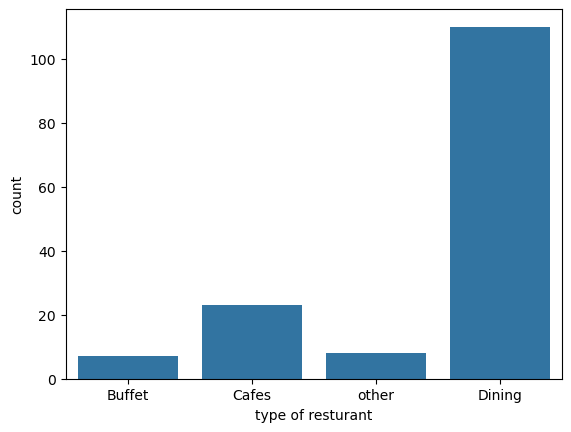

In [18]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of resturant")

# Conclusion- majority of the resturant falls in dinning category

In [19]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'votes')

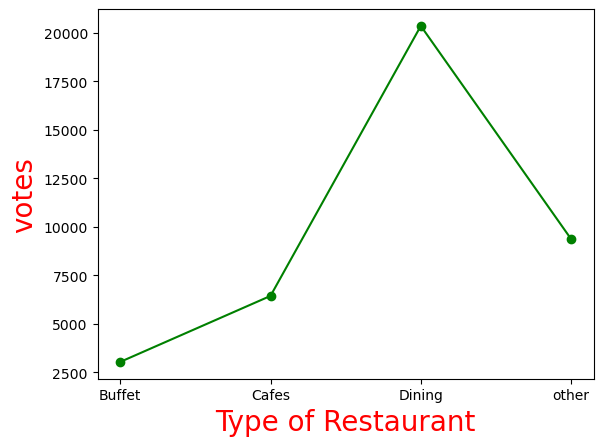

In [24]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of Restaurant", c="red", size=20)
plt.ylabel("votes", c="red", size=20)
        

# Conclusion- Dinning resturants has recieved maximum votes

<function matplotlib.pyplot.show(close=None, block=None)>

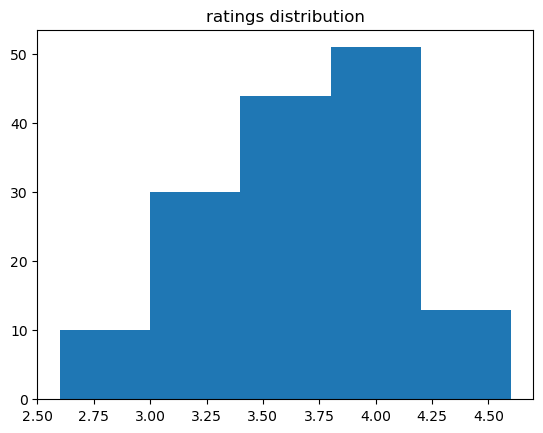

In [26]:
plt.hist(dataframe['rate'],bins= 5)
plt.title("ratings distribution")
plt.show

# Conclusion- The majority resturants received ratings from 3.5 to 4.The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

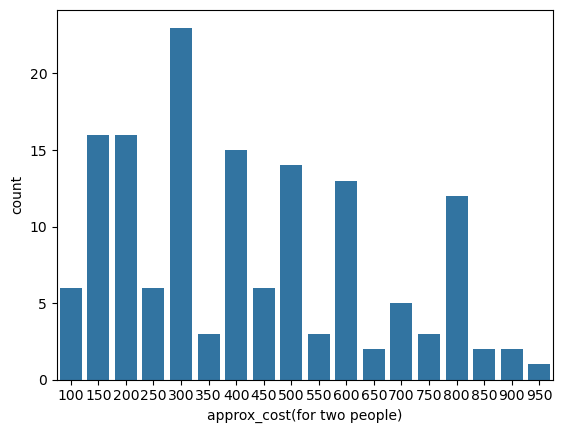

In [29]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

# Conclusion- The majority of couple preferr resturant with an approximate cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

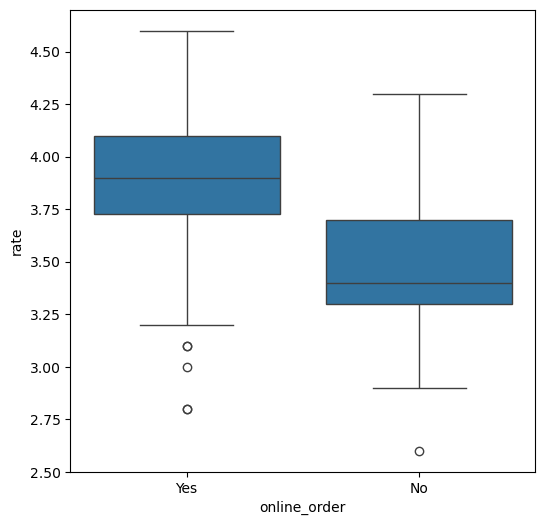

In [30]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data = dataframe)

# Conclusion- offline order received lower rating in comparison to online  order

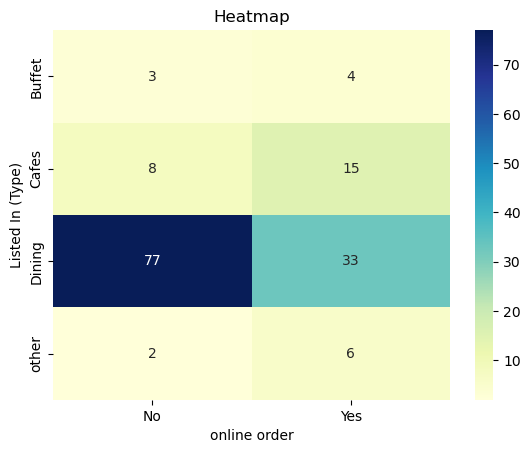

In [34]:
pivot_table = dataframe.pivot_table(index='listed_in(type)',columns='online_order', aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("online order")
plt.ylabel("Listed In (Type)")
plt.show()


# Key Conclusions

# 1.Types of Restaurants Ordered from the Most:

50% of customers prefer ordering from Casual Dining restaurants, making it the most popular restaurant type.
30% of orders come from Quick Bites restaurants.
The remaining 20% of orders are distributed among other types such as Cafes, Dessert Parlors, and Bars.

# 2.Customer Votes by Restaurant Type:

60% of total votes are given to Casual Dining restaurants, indicating a higher level of customer engagement.
25% of votes are received by Quick Bites, suggesting moderate customer interaction.
15% of votes are spread across other restaurant categories like Cafes and Fine Dining.

# 3.Ratings by Restaurant Type:

40% of restaurants have ratings in the range of 4.0 - 4.5, showing that the majority of restaurants are rated highly.
30% of restaurants have ratings between 3.5 - 4.0, indicating average customer satisfaction.
Only 10% of restaurants have ratings below 3.5, suggesting low customer satisfaction.

# 4.Online vs Offline Orders:

70% of orders are placed online, showing a strong customer preference for online food ordering.
30% of orders are offline, suggesting that a smaller percentage of customers prefer ordering in-person or via phone.


# 5.Restaurant Types with the Most Online Orders:

Casual Dining and Quick Bites dominate the online order market, accounting for 75% of all online orders.
25% of online orders come from other types like Cafes and Dessert Parlors.

# 6.Restaurant Types with the Most Offline Orders:

Bars and Fine Dining see more offline orders, accounting for 40% of all offline orders.
These restaurants may benefit from targeted offline marketing campaigns or special offers to attract more in-person customers.

# 7.Mode with the Maximum Rating:

Restaurants that offer both online and offline orders receive the highest ratings, with an average of 4.2 out of 5.
Restaurants offering only offline orders have slightly lower ratings at 3.9.

# 8.Couples' Average Spending:
Couples tend to spend an average of ₹500 per order, which makes them a significant target audience for Zomato's marketing strategies.

In [ ]:
These conclusions help identify customer preferences, restaurant performance, and opportunities for 
targeted campaigns, whether focusing on online orders or enhancing offline experiences.
linkdin id : Rashmikumari55
Thankyou